In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

In [3]:
def GetData1(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])

    return x, y, err, xstep, ystep

def GetData2(filename1,filename2):
    x1, y1, err1, xstep1, ystep1 = GetData1(filename1)
    x2, y2, err2, xstep2, ystep2 = GetData1(filename2)
    x = x1
    y = 0.5*(y1+y2)
    err = 0.5*np.sqrt(err1*err1+err2*err2)
    xstep = xstep1
    ystep = 0.5*(ystep1+ystep2)
    return x, y, err, xstep, ystep

def GetExpData(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])
    sysp = np.append(data[:,6],data[-1,6])
    sysm = -sysp
    #print(len(data[0,:]))
    if len(data[0,:]) > 7:
        sysm = np.append(data[:,7],data[-1,7])
    return x, y, err, xstep, ystep, sysp, sysm

def GetDataRatio(x1, y1, err1, xstep1, ystep1, x2, y2, err2, xstep2, ystep2):
    x = x1
    y = y1/y2
    err = np.sqrt( (err1/y2)*(err1/y2) + (y1*err2/y2/y2)*(y1*err2/y2/y2) )
    xstep = xstep1
    ystep = ystep1/ystep2
    return x, y, err, xstep, ystep

In [4]:
def name():
    return 'Parton'

def plot_name():
    return 'Parton_Jet_Shape_Negative_Reco.pdf'

def plot_jet_shape(ax):
    ax.set_xlim(0.0,1.0)
    ax.set_ylim(0.005,50)
    ax.set_yscale('log')

    file_PP_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_pp.txt'
    x_pp_exp, y_pp_exp, err_pp_exp, xstep_pp_exp, ystep_pp_exp, sysp_pp_exp, sysm_pp_exp = GetExpData(file_PP_EXP)

    file_AA_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_0-10.txt'
    x_aa_exp, y_aa_exp, err_aa_exp, xstep_aa_exp, ystep_aa_exp, sysp_aa_exp, sysm_aa_exp = GetExpData(file_AA_EXP)


    file_PP = '../../data_bank/JetShape/PartonJetShape/5020_PP_Colorless/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_pp, y_pp, err_pp, xstep_pp, ystep_pp = GetData1(file_PP)

    file_AA = '../../data_bank/JetShape/PartonJetShape/MATTER_LBT_FixedAlphaS/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetData1(file_AA)


    ax.errorbar(x_pp_exp, y_pp_exp, yerr=err_pp_exp, marker="o", linestyle="none", color = 'cadetblue',markersize=8)
    ax.fill_between(xstep_pp_exp, ystep_pp_exp+sysp_pp_exp, ystep_pp_exp+sysm_pp_exp, step='post', color='cadetblue', alpha=0.15)


    ax.errorbar(x_aa_exp, y_aa_exp, yerr=err_aa_exp, marker="s", linestyle="none", color = 'indianred',markersize=8)
    ax.fill_between(xstep_aa_exp, ystep_aa_exp+sysp_aa_exp, ystep_aa_exp+sysm_aa_exp, step='post', color='indianred', alpha=0.15)

    ax.step(xstep_pp, ystep_pp, where='post', color='blue',linestyle='dashed', linewidth = 2)
    ax.errorbar(x_pp, y_pp, err_pp, marker="", linestyle="none", color='blue')

    ax.step(xstep_aa, ystep_aa, where='post', color='red',linestyle='solid', linewidth = 2)
    ax.errorbar(x_aa, y_aa, err_aa, marker="", linestyle="none", color='red')

def plot_jet_shape_ratio(ax):

    ax.set_xlim(0.0,1.0)
    ax.set_ylim(0.4,2.6)
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)    

    file_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_ratio_0-10.txt'
    x_exp, y_exp, err_exp, xstep_exp, ystep_exp, sysp_exp, sysm_exp = GetExpData(file_EXP)

    file_PP = '../../data_bank/JetShape/PartonJetShape/5020_PP_Colorless/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_pp, y_pp, err_pp, xstep_pp, ystep_pp = GetData1(file_PP)

    file_AA = '../../data_bank/JetShape/PartonJetShape/MATTER_LBT_FixedAlphaS/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetData1(file_AA)

    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetDataRatio(x_aa, y_aa, err_aa, xstep_aa, ystep_aa, x_pp, y_pp, err_pp, xstep_pp, ystep_pp)


    ax.errorbar(x_exp, y_exp, yerr=err_exp, marker="s", linestyle="none", color = 'indianred',markersize=8)
    ax.fill_between(xstep_exp, ystep_exp+sysp_exp, ystep_exp+sysm_exp, step='post', color='indianred', alpha=0.15)

    ax.step(xstep_aa, ystep_aa, where='post', color='red',linestyle='solid', linewidth = 2)
    ax.errorbar(x_aa, y_aa, err_aa, marker="", linestyle="none", color='red')

In [5]:
def name():
    return 'Parton (naive subtraction)'

def plot_name():
    return 'Parton_Jet_Shape_Standard_Reco.pdf'

def plot_jet_shape(ax):
    ax.set_xlim(0.0,1.0)
    ax.set_ylim(0.005,50)
    ax.set_yscale('log')

    file_PP_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_pp.txt'
    x_pp_exp, y_pp_exp, err_pp_exp, xstep_pp_exp, ystep_pp_exp, sysp_pp_exp, sysm_pp_exp = GetExpData(file_PP_EXP)

    file_AA_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_0-10.txt'
    x_aa_exp, y_aa_exp, err_aa_exp, xstep_aa_exp, ystep_aa_exp, sysp_aa_exp, sysm_aa_exp = GetExpData(file_AA_EXP)


    file_PP = '../../data_bank/JetShape/PartonJetShapeStandardReco/5020_PP_Colorless/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_pp, y_pp, err_pp, xstep_pp, ystep_pp = GetData1(file_PP)

    file_AA = '../../data_bank/JetShape/PartonJetShapeStandardReco/MATTER_LBT_FixedAlphaS/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetData1(file_AA)


    ax.errorbar(x_pp_exp, y_pp_exp, yerr=err_pp_exp, marker="o", linestyle="none", color = 'cadetblue',markersize=8)
    ax.fill_between(xstep_pp_exp, ystep_pp_exp+sysp_pp_exp, ystep_pp_exp+sysm_pp_exp, step='post', color='cadetblue', alpha=0.15)


    ax.errorbar(x_aa_exp, y_aa_exp, yerr=err_aa_exp, marker="s", linestyle="none", color = 'indianred',markersize=8)
    ax.fill_between(xstep_aa_exp, ystep_aa_exp+sysp_aa_exp, ystep_aa_exp+sysm_aa_exp, step='post', color='indianred', alpha=0.15)

    ax.step(xstep_pp, ystep_pp, where='post', color='blue',linestyle='dashed', linewidth = 2)
    ax.errorbar(x_pp, y_pp, err_pp, marker="", linestyle="none", color='blue')

    ax.step(xstep_aa, ystep_aa, where='post', color='red',linestyle='solid', linewidth = 2)
    ax.errorbar(x_aa, y_aa, err_aa, marker="", linestyle="none", color='red')

def plot_jet_shape_ratio(ax):

    ax.set_xlim(0.0,1.0)
    ax.set_ylim(0.4,2.6)
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)    

    file_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_ratio_0-10.txt'
    x_exp, y_exp, err_exp, xstep_exp, ystep_exp, sysp_exp, sysm_exp = GetExpData(file_EXP)

    file_PP = '../../data_bank/JetShape/PartonJetShapeStandardReco/5020_PP_Colorless/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_pp, y_pp, err_pp, xstep_pp, ystep_pp = GetData1(file_PP)

    file_AA = '../../data_bank/JetShape/PartonJetShapeStandardReco/MATTER_LBT_FixedAlphaS/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetData1(file_AA)

    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetDataRatio(x_aa, y_aa, err_aa, xstep_aa, ystep_aa, x_pp, y_pp, err_pp, xstep_pp, ystep_pp)


    ax.errorbar(x_exp, y_exp, yerr=err_exp, marker="s", linestyle="none", color = 'indianred',markersize=8)
    ax.fill_between(xstep_exp, ystep_exp+sysp_exp, ystep_exp+sysm_exp, step='post', color='indianred', alpha=0.15)

    ax.step(xstep_aa, ystep_aa, where='post', color='red',linestyle='solid', linewidth = 2)
    ax.errorbar(x_aa, y_aa, err_aa, marker="", linestyle="none", color='red')




In [6]:
def name():
    return 'Hadronized'

def plot_name():
    return 'Hadron_Jet_Shape_Negative_Reco.pdf'

def plot_jet_shape(ax):
    ax.set_xlim(0.0,1.0)
    ax.set_ylim(0.005,50)
    ax.set_yscale('log')

    file_PP_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_pp.txt'
    x_pp_exp, y_pp_exp, err_pp_exp, xstep_pp_exp, ystep_pp_exp, sysp_pp_exp, sysm_pp_exp = GetExpData(file_PP_EXP)

    file_AA_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_0-10.txt'
    x_aa_exp, y_aa_exp, err_aa_exp, xstep_aa_exp, ystep_aa_exp, sysp_aa_exp, sysm_aa_exp = GetExpData(file_AA_EXP)


    file_PP = '../../data_bank/JetShape/HadronJetShape/5020_PP_Colorless/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_pp, y_pp, err_pp, xstep_pp, ystep_pp = GetData1(file_PP)

    file_AA = '../../data_bank/JetShape/HadronJetShape/MATTER_LBT_FixedAlphaS/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetData1(file_AA)


    ax.errorbar(x_pp_exp, y_pp_exp, yerr=err_pp_exp, marker="o", linestyle="none", color = 'cadetblue',markersize=8)
    ax.fill_between(xstep_pp_exp, ystep_pp_exp+sysp_pp_exp, ystep_pp_exp+sysm_pp_exp, step='post', color='cadetblue', alpha=0.15)


    ax.errorbar(x_aa_exp, y_aa_exp, yerr=err_aa_exp, marker="s", linestyle="none", color = 'indianred',markersize=8)
    ax.fill_between(xstep_aa_exp, ystep_aa_exp+sysp_aa_exp, ystep_aa_exp+sysm_aa_exp, step='post', color='indianred', alpha=0.15)

    ax.step(xstep_pp, ystep_pp, where='post', color='blue',linestyle='dashed', linewidth = 2)
    ax.errorbar(x_pp, y_pp, err_pp, marker="", linestyle="none", color='blue')

    ax.step(xstep_aa, ystep_aa, where='post', color='red',linestyle='solid', linewidth = 2)
    ax.errorbar(x_aa, y_aa, err_aa, marker="", linestyle="none", color='red')

def plot_jet_shape_ratio(ax):

    ax.set_xlim(0.0,1.0)
    ax.set_ylim(0.4,2.6)
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)    

    file_EXP = '../../exp_data/hepdata_cms_jet_prop_5tev/normalized_jetshape_ratio_0-10.txt'
    x_exp, y_exp, err_exp, xstep_exp, ystep_exp, sysp_exp, sysm_exp = GetExpData(file_EXP)

    file_PP = '../../data_bank/JetShape/HadronJetShape/5020_PP_Colorless/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_pp, y_pp, err_pp, xstep_pp, ystep_pp = GetData1(file_PP)

    file_AA = '../../data_bank/JetShape/HadronJetShape/MATTER_LBT_FixedAlphaS/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/normalized_jetshape_hist_total_JetShape_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.0-10000.0_rap0.0-2.6.txt'
    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetData1(file_AA)

    x_aa, y_aa, err_aa, xstep_aa, ystep_aa = GetDataRatio(x_aa, y_aa, err_aa, xstep_aa, ystep_aa, x_pp, y_pp, err_pp, xstep_pp, ystep_pp)


    ax.errorbar(x_exp, y_exp, yerr=err_exp, marker="s", linestyle="none", color = 'indianred',markersize=8)
    ax.fill_between(xstep_exp, ystep_exp+sysp_exp, ystep_exp+sysm_exp, step='post', color='indianred', alpha=0.15)

    ax.step(xstep_aa, ystep_aa, where='post', color='red',linestyle='solid', linewidth = 2)
    ax.errorbar(x_aa, y_aa, err_aa, marker="", linestyle="none", color='red')




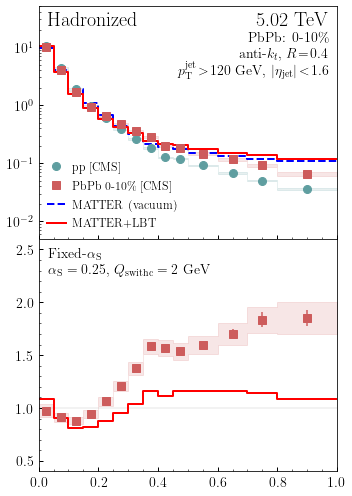

In [18]:
def height1(y):
    min = 0.005
    max = 50.
    log_min = np.log10(min)
    return pow(10,y*(np.log10(max) -log_min ) + log_min)

def height2(y):
    min = 0.4
    max = 2.6
    return y*( max-min ) + min



fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (1,1)})

for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()


plot_jet_shape(axs[0])
plot_jet_shape_ratio(axs[1])

##########################################################################################################
#======================================================================================
axs[0].text(0.03, height1(0.92), name(), fontsize = 20, ha = 'left')
axs[0].text(0.97, height1(0.92), r'5.02 TeV', fontsize = 20, ha = 'right')
axs[0].text(0.97, height1(0.85), r'PbPb: 0-10\%', fontsize = 14, ha = 'right')
axs[0].text(0.97, height1(0.78), r'anti-$k_t$, $R\!=\!0.4$', fontsize = 14, ha = 'right')
axs[0].text(0.97, height1(0.71), r'$p_{\mathrm{T}}^{\mathrm{jet}}\!>\!120$ GeV, $|\eta_{\mathrm{jet}}|\!<\!1.6$', fontsize = 14, ha = 'right')

axs[1].text(0.03, height2(0.92), r'Fixed-$\alpha_{\mathrm{S}}$', fontsize = 14, ha = 'left')
axs[1].text(0.03, height2(0.85), r'$\alpha_{\mathrm{S}}=0.25$, $Q_{\mathrm{swithc}}=2$ GeV', fontsize = 14, ha = 'left')

#======================================================================================
axs[0].plot([],[], label= 'pp [CMS]', marker="o", linestyle="none", color = 'cadetblue',markersize=8)
axs[0].plot([],[], label= 'PbPb 0-10\% [CMS]', marker="s", linestyle="none", color = 'indianred',markersize=8)
axs[0].plot([],[], label= 'MATTER (vacuum)', linestyle="dashed", color = 'blue', linewidth = 2)
axs[0].plot([],[], label= 'MATTER+LBT', linestyle="solid", color = 'red', linewidth = 2)
axs[0].legend(bbox_to_anchor=(-0.03, -0.03), borderaxespad=1,handlelength=1.6, handletextpad=0.5,loc='lower left', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#======================================================================================

plt.tight_layout()
plt.savefig(plot_name())

